# **1. 라이브러리 호출**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula. api as smf
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

# **2. 데이터 이해**

## 1) 데이터 로드
- UCI Machine Learning Repository의 데이터셋 활용
- hour.csv   : 시간 단위로 집계된 자전거 공유 수입니다. --> 17,379시간

In [2]:
hour_df = pd.read_csv('./csv_data_file/hour.csv')
hour_df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [3]:
hour_df.shape

(17379, 17)

In [4]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## 2) 데이터 null값 확인

In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## 3) Columns
1) instant     : 인덱스
2) dteday      : 날짜           
3) season      : (1:봄, 2:여름, 3:가을, 4:겨울)      
4) yr          : 연도(0: 2011, 1: 2012)
5) mnth        : 월(1 ~ 12)
6) hr          : 시간(0~23)           
7) holiday     : 휴일 1, 그렇지 않은 경우 0
8) weekday     : 요일
9) workingday  : day가 주말/휴일이 아닌 경우 1, 그렇지 않은 경우 0.
10) weathersit : 기상 상황                         
- 1: 맑고 구름이 적으며, 부분적으로 흐림, 부분적으로 흐림
- 2: 안개 + 구름, 안개 + 구름 깨짐, 안개 + 구름 몇 개, 안개
- 3: 가벼운 눈, 가벼운 비 + 뇌우 + 산발적인 구름, 가벼운 비 + 산발적인 구름
- 4: 폭우 + 얼음 팔레트 + 뇌우 + 안개, 눈 + 안개
11) temp       : 온도(섭씨), 값은 41(최대) 
- 온도 : 섭씨 정상 온도. 
- (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39(시간 단위로만)를 통해 정규화된 값 도출.
12) atemp      : 체감 온도(섭씨), 값은 50(최대)
- 체감 온도 : 섭씨로 정규화된 체감 온도. 
- (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50(시간 단위로만)을 통해 정규화된 값 도출.
13) hum        : 습도, 값은 100(최대)
14) windspeed  : 풍속, 값은 67(최대)
15) casual     : 캐주얼 사용자 수
16) registered : 등록된 사용자 수
17) cnt        : 총 대여 자전거 수 (캐주얼 및 등록된 사용자 모두)

# **3. 데이터 탐색 및 전처리**

1. 범주형 변수 : 
- season, weathersit
2. 이진법을 사용한 변수 : 
- holiday, weekday, workingday
3. 년 월 일 변수 :
- yr, mnth, hr
4. 연속형 변수 :
-  temp, atemp, hum, windspeed, cnt         

## 1) 범주형 변수들의 더미변수화 하기
- 피어슨 상관계수, 회귀분석을 위한

In [7]:
hour_df['season'].unique()
season_dummies = pd.get_dummies(hour_df['season'], prefix='season')
hour_df = pd.concat([hour_df, season_dummies], axis=1)

In [8]:
hour_df['weathersit'].unique()
weathersit_dummies = pd.get_dummies(hour_df['weathersit'], prefix='weathersit')
hour_df = pd.concat([hour_df, weathersit_dummies], axis=1)

In [9]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,registered,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,13,16,1,0,0,0,1,0,0,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,32,40,1,0,0,0,1,0,0,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,27,32,1,0,0,0,1,0,0,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,10,13,1,0,0,0,1,0,0,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,1,1,1,0,0,0,1,0,0,0


## 2) (연속형)변수들의 분포 확인
- temp, atemp, hum, windspeed, casual, registered, cnt  

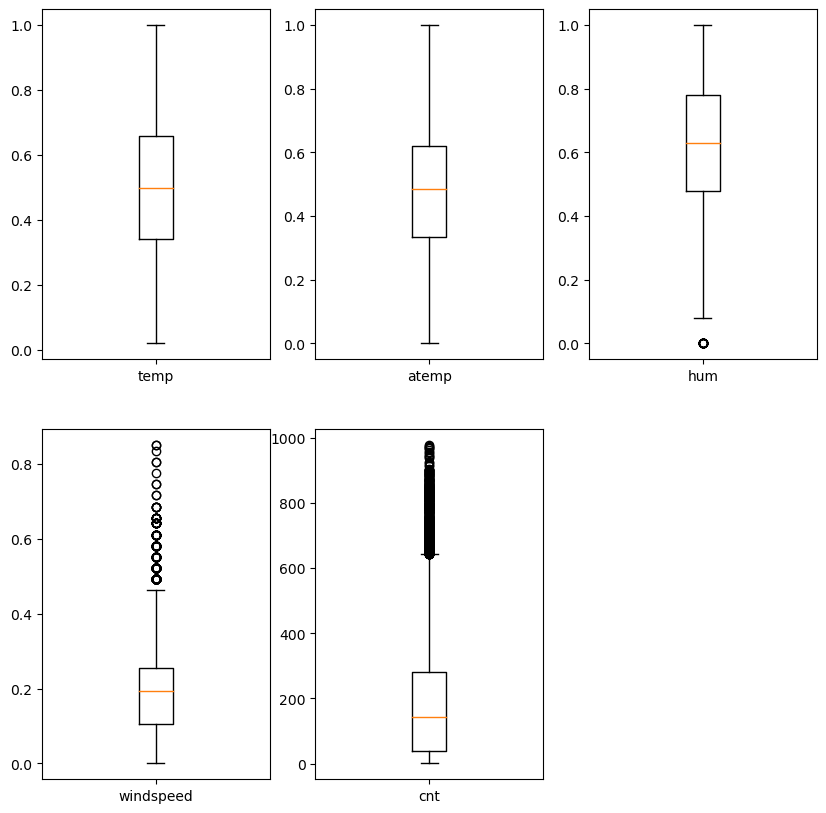

In [10]:
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2,3,1)
ax1.boxplot(hour_df['temp'])
ax1.set_xticklabels(['temp'])

ax2 = fig.add_subplot(2,3,2)
ax2.boxplot(hour_df['atemp'])
ax2.set_xticklabels(['atemp'])

ax3 = fig.add_subplot(2,3,3)
ax3.boxplot(hour_df['hum'])
ax3.set_xticklabels(['hum'])

ax4 = fig.add_subplot(2,3,4)
ax4.boxplot(hour_df['windspeed'])
ax4.set_xticklabels(['windspeed'])

ax5 = fig.add_subplot(2,3,5)
ax5.boxplot(hour_df['cnt'])
ax5.set_xticklabels(['cnt'])

plt.show()

## 시각화 결과 값에 습도가 0인 것이 있다. -> 습도가 0일 수는 없다

In [12]:
hour_df['hum'].unique()

array([0.81, 0.8 , 0.75, 0.86, 0.76, 0.77, 0.72, 0.82, 0.88, 0.87, 0.94,
       1.  , 0.71, 0.66, 0.57, 0.46, 0.42, 0.39, 0.44, 0.47, 0.5 , 0.43,
       0.4 , 0.35, 0.3 , 0.32, 0.64, 0.69, 0.55, 0.59, 0.63, 0.68, 0.74,
       0.51, 0.56, 0.52, 0.49, 0.48, 0.37, 0.33, 0.28, 0.38, 0.36, 0.93,
       0.29, 0.53, 0.34, 0.54, 0.41, 0.45, 0.92, 0.62, 0.58, 0.61, 0.6 ,
       0.65, 0.7 , 0.27, 0.21, 0.25, 0.26, 0.31, 0.73, 0.24, 0.23, 0.22,
       0.19, 0.15, 0.67, 0.1 , 0.08, 0.12, 0.14, 0.13, 0.17, 0.16, 0.18,
       0.96, 0.2 , 0.85, 0.  , 0.9 , 0.83, 0.78, 0.84, 0.89, 0.79, 0.97,
       0.91])

In [13]:
# 습도가 0인 값 22개
filtered_df = hour_df[hour_df['hum'] <= 0]
len(filtered_df)

22

In [14]:
# 습도가 0인 값을 평균갑으로
hour_df.loc[hour_df['hum'] == 0., 'hum'] = hour_df['hum'].mean()

## 3) (범주형)변수들의 분산분석
- 일원분산검정 및 사후검정 : "season(더미화 1-4)", "mnth", "hr", "weekday", "weathersit(더미화 1-4)"
- t-test :  "yr", "holiday", "workingday"

##### **(1) 시즌별 대여횟수**
##### 여름과 겨울이 유의한 차이가 있다.
- (1 - 3)      9.475     0.058    -0.218    19.169
- (3 - 1)     -9.475     0.058   -19.169     0.218

In [15]:
hour_df['season'].value_counts().sort_values()

spring = hour_df.query("season == 1")["cnt"]
summer = hour_df.query("season == 2")["cnt"]
autumn = hour_df.query("season == 3")["cnt"]
winter = hour_df.query("season == 4")["cnt"]

print("일원 분산분석  : ", stats.f_oneway(spring, summer, autumn, winter))
result = stats.tukey_hsd(spring, summer, autumn, winter)
print("분산 분석의 사후분석 : ", result)

일원 분산분석  :  F_onewayResult(statistic=409.1810372630525, pvalue=7.40107139971279e-257)
분산 분석의 사후분석 :  Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)    -97.230     0.000  -106.917   -87.542
 (0 - 2)   -124.902     0.000  -134.543  -115.260
 (0 - 3)    -87.754     0.000   -97.541   -77.968
 (1 - 0)     97.230     0.000    87.542   106.917
 (1 - 2)    -27.672     0.000   -37.219   -18.125
 (1 - 3)      9.475     0.058    -0.218    19.169
 (2 - 0)    124.902     0.000   115.260   134.543
 (2 - 1)     27.672     0.000    18.125    37.219
 (2 - 3)     37.147     0.000    27.500    46.795
 (3 - 0)     87.754     0.000    77.968    97.541
 (3 - 1)     -9.475     0.058   -19.169     0.218
 (3 - 2)    -37.147     0.000   -46.795   -27.500



##### **(2) 년도별 대여횟수**
##### 두 개의 독립된 표본 간에는 통계적으로 유의한 차이가 있다

In [16]:
y2011 = hour_df.query("yr == 0")["cnt"]
y2012 = hour_df.query("yr == 1")["cnt"]

print("독립표본 t-Test  : ", stats.ttest_ind(y2011, y2012))

독립표본 t-Test  :  Ttest_indResult(statistic=-34.10813930288585, pvalue=7.213184208684302e-247)


##### **3) 월별 대여횟수**
##### 아래의 독립된 표본 간에는 통계적으로 유의한 차이가 있다
- (0 - 1)    -18.440     0.189   -40.125     3.245
- (2 - 10)    -21.925     0.034   -43.072    -0.777
- (2 - 11)     13.107     0.664    -7.874    34.088
- (3 - 10)      9.926     0.934   -11.353    31.204
- (4 - 5)    -17.608     0.212   -38.692     3.476
- (4 - 6)     -8.913     0.965   -29.823    11.998
- (4 - 7)    -15.190     0.427   -36.147     5.766
- (4 - 8)    -17.866     0.194   -38.961     3.229
- (4 - 9)      0.749     1.000   -20.294    21.792
- (5 - 6)      8.695     0.973   -12.388    29.779
- (5 - 7)      2.418     1.000   -18.712    23.547
- (5 - 8)     -0.258     1.000   -21.525    21.009
- (5 - 9)     18.357     0.168    -2.859    39.572
- (6 - 7)     -6.278     0.998   -27.234    14.679
- (6 - 8)     -8.953     0.966   -30.048    12.142
- (6 - 9)      9.661     0.941   -11.382    30.705
- (7 - 8)     -2.676     1.000   -23.816    18.465
- (7 - 9)     15.939     0.359    -5.150    37.028
- (8 - 9)     18.615     0.153    -2.612    39.841

In [17]:
m1 = hour_df.query("mnth == 1")["cnt"]
m2 = hour_df.query("mnth == 2")["cnt"]
m3 = hour_df.query("mnth == 3")["cnt"]
m4 = hour_df.query("mnth == 4")["cnt"]
m5 = hour_df.query("mnth == 5")["cnt"]
m6 = hour_df.query("mnth == 6")["cnt"]
m7 = hour_df.query("mnth == 7")["cnt"]
m8 = hour_df.query("mnth == 8")["cnt"]
m9 = hour_df.query("mnth == 9")["cnt"]
m10 = hour_df.query("mnth == 10")["cnt"]
m11 = hour_df.query("mnth == 11")["cnt"]
m12 = hour_df.query("mnth == 12")["cnt"]

print("일원 분산분석  : ", stats.f_oneway(m1, m2, m3, m4, m5, m6, m7, m8, m9, m10, m11, m12))
result = stats.tukey_hsd(m1, m2, m3, m4, m5, m6, m7, m8, m9, m10, m11, m12)
print("분산 분석의 사후분석 : ", result)

일원 분산분석  :  F_onewayResult(statistic=128.1021897089323, pvalue=5.505684936484358e-284)
분산 분석의 사후분석 :  Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)    -18.440     0.189   -40.125     3.245
 (0 - 2)    -60.986     0.000   -82.164   -39.808
 (0 - 3)    -92.836     0.000  -114.144   -71.528
 (0 - 4)   -128.482     0.000  -149.608  -107.357
 (0 - 5)   -146.091     0.000  -167.387  -124.794
 (0 - 6)   -137.395     0.000  -158.520  -116.270
 (0 - 7)   -143.673     0.000  -164.843  -122.502
 (0 - 8)   -146.348     0.000  -167.656  -125.040
 (0 - 9)   -127.734     0.000  -148.990  -106.477
 (0 - 10)    -82.911     0.000  -104.219   -61.603
 (0 - 11)    -47.879     0.000   -69.021   -26.736
 (1 - 0)     18.440     0.189    -3.245    40.125
 (1 - 2)    -42.546     0.000   -64.073   -21.018
 (1 - 3)    -74.396     0.000   -96.052   -52.740
 (1 - 4)   -110.042     0.000  -131.518   -88.567
 (1 - 5)   -127.650     0.00

##### **(4) 시간별 대여횟수**
##### 아래의 독립된 표본 간에는 통계적으로 유의한 차이가 있다
- (0 - 1)    -18.440     0.189   -40.125     3.245
- (1 - 0)     18.440     0.189    -3.245    40.125
- (2 - 10)    -21.925     0.034   -43.072    -0.777
- (2 - 11)     13.107     0.664    -7.874    34.088
- (3 - 10)      9.926     0.934   -11.353    31.204
- (4 - 5)    -17.608     0.212   -38.692     3.476
- (4 - 6)     -8.913     0.965   -29.823    11.998
- (4 - 7)    -15.190     0.427   -36.147     5.766
- (4 - 8)    -17.866     0.194   -38.961     3.229
- (4 - 9)      0.749     1.000   -20.294    21.792
- (5 - 6)      8.695     0.973   -12.388    29.779
- (5 - 7)      2.418     1.000   -18.712    23.547
- (5 - 8)     -0.258     1.000   -21.525    21.009
- (5 - 9)     18.357     0.168    -2.859    39.572
- (6 - 7)     -6.278     0.998   -27.234    14.679
- (6 - 8)     -8.953     0.966   -30.048    12.142
- (6 - 9)      9.661     0.941   -11.382    30.705
- (7 - 8)     -2.676     1.000   -23.816    18.465
- (7 - 9)     15.939     0.359    -5.150    37.028
- (8 - 7)      2.676     1.000   -18.465    23.816
- (8 - 9)     18.615     0.153    -2.612    39.841

In [18]:
h1 = hour_df.query("hr == 1")["cnt"]
h2 = hour_df.query("hr == 2")["cnt"]
h3 = hour_df.query("hr == 3")["cnt"]
h4 = hour_df.query("hr == 4")["cnt"]
h5 = hour_df.query("hr == 5")["cnt"]
h6 = hour_df.query("hr == 6")["cnt"]
h7 = hour_df.query("hr == 7")["cnt"]
h8 = hour_df.query("hr == 8")["cnt"]
h9 = hour_df.query("hr == 9")["cnt"]
h10 = hour_df.query("hr == 10")["cnt"]
h11 = hour_df.query("hr == 11")["cnt"]
h12 = hour_df.query("hr == 12")["cnt"]
h13 = hour_df.query("hr == 13")["cnt"]
h14 = hour_df.query("hr == 14")["cnt"]
h15 = hour_df.query("hr == 15")["cnt"]
h16 = hour_df.query("hr == 16")["cnt"]
h17 = hour_df.query("hr == 17")["cnt"]
h18 = hour_df.query("hr == 18")["cnt"]
h19 = hour_df.query("hr == 19")["cnt"]
h20 = hour_df.query("hr == 20")["cnt"]
h21 = hour_df.query("hr == 21")["cnt"]
h22 = hour_df.query("hr == 22")["cnt"]
h23 = hour_df.query("hr == 23")["cnt"]
h0 = hour_df.query("hr == 0")["cnt"]


print("일원 분산분석  : ", stats.f_oneway(m1, m2, m3, m4, m5, m6, m7, m8, m9, m10, m11, m12))
result = stats.tukey_hsd(m1, m2, m3, m4, m5, m6, m7, m8, m9, m10, m11, m12)
print("분산 분석의 사후분석 : ", result)

일원 분산분석  :  F_onewayResult(statistic=128.1021897089323, pvalue=5.505684936484358e-284)
분산 분석의 사후분석 :  Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)    -18.440     0.189   -40.125     3.245
 (0 - 2)    -60.986     0.000   -82.164   -39.808
 (0 - 3)    -92.836     0.000  -114.144   -71.528
 (0 - 4)   -128.482     0.000  -149.608  -107.357
 (0 - 5)   -146.091     0.000  -167.387  -124.794
 (0 - 6)   -137.395     0.000  -158.520  -116.270
 (0 - 7)   -143.673     0.000  -164.843  -122.502
 (0 - 8)   -146.348     0.000  -167.656  -125.040
 (0 - 9)   -127.734     0.000  -148.990  -106.477
 (0 - 10)    -82.911     0.000  -104.219   -61.603
 (0 - 11)    -47.879     0.000   -69.021   -26.736
 (1 - 0)     18.440     0.189    -3.245    40.125
 (1 - 2)    -42.546     0.000   -64.073   -21.018
 (1 - 3)    -74.396     0.000   -96.052   -52.740
 (1 - 4)   -110.042     0.000  -131.518   -88.567
 (1 - 5)   -127.650     0.00

##### **(5) 휴일/주말 여부별 대여횟수**
##### 두 개의 독립된 표본 간에는 통계적으로 유의한 차이가 있다

In [19]:
holi_no = hour_df.query("holiday == 0")["cnt"]
holi_yes = hour_df.query("holiday == 1")["cnt"]

print("독립표본 t-Test  : ", stats.ttest_ind(holi_no, holi_yes))

독립표본 t-Test  :  Ttest_indResult(statistic=4.07884548432246, pvalue=4.5461689487652855e-05)


##### **(6) 요일별 대여횟수**
##### 아래의 독립된 표본 간에는 통계적으로 유의한 차이가 있다
- (0 - 1)     -6.276     0.886   -21.426     8.875
- (0 - 2)    -13.770     0.105   -28.961     1.421
- (0 - 3)    -13.662     0.109   -28.818     1.495
- (0 - 6)    -12.741     0.164   -27.841     2.359
- (1 - 2)     -7.494     0.774   -22.720     7.731
- (1 - 3)     -7.386     0.784   -22.577     7.806
- (1 - 4)    -12.692     0.173   -27.890     2.506
- (1 - 5)    -12.391     0.195   -27.564     2.782
- (1 - 6)     -6.465     0.870   -21.600     8.670
- (2 - 3)      0.108     1.000   -15.123    15.340
- (2 - 4)     -5.198     0.953   -20.436    10.040
- (2 - 5)     -4.897     0.964   -20.110    10.316
- (2 - 6)      1.029     1.000   -14.147    16.205
- (3 - 4)     -5.306     0.947   -20.510     9.898
- (3 - 5)     -5.005     0.960   -20.185    10.174
- (3 - 6)      0.921     1.000   -14.221    16.062
- (4 - 5)      0.301     1.000   -14.885    15.486
- (4 - 6)      6.227     0.890    -8.921    21.375
- (5 - 6)      5.926     0.911    -9.197    21.049

In [20]:
sun = hour_df.query("weekday == 0")["cnt"]
mon = hour_df.query("weekday == 1")["cnt"]
tue = hour_df.query("weekday == 2")["cnt"]
wed = hour_df.query("weekday == 3")["cnt"]
thu = hour_df.query("weekday == 4")["cnt"]
fri = hour_df.query("weekday == 5")["cnt"]
sat = hour_df.query("weekday == 6")["cnt"]

print("일원 분산분석  : ", stats.f_oneway(sun, mon, tue, wed, thu, fri, sat))
result = stats.tukey_hsd(sun, mon, tue, wed, thu, fri, sat)
print("분산 분석의 사후분석 : ", result)

일원 분산분석  :  F_onewayResult(statistic=3.487790047928153, pvalue=0.0018990310434750582)


/Users/jang-yeji/miniconda3/envs/dataanalysis/lib/python3.8/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


분산 분석의 사후분석 :  Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -6.276     0.886   -21.426     8.875
 (0 - 2)    -13.770     0.105   -28.961     1.421
 (0 - 3)    -13.662     0.109   -28.818     1.495
 (0 - 4)    -18.968     0.004   -34.131    -3.805
 (0 - 5)    -18.667     0.005   -33.805    -3.529
 (0 - 6)    -12.741     0.164   -27.841     2.359
 (1 - 0)      6.276     0.886    -8.875    21.426
 (1 - 2)     -7.494     0.774   -22.720     7.731
 (1 - 3)     -7.386     0.784   -22.577     7.806
 (1 - 4)    -12.692     0.173   -27.890     2.506
 (1 - 5)    -12.391     0.195   -27.564     2.782
 (1 - 6)     -6.465     0.870   -21.600     8.670
 (2 - 0)     13.770     0.105    -1.421    28.961
 (2 - 1)      7.494     0.774    -7.731    22.720
 (2 - 3)      0.108     1.000   -15.123    15.340
 (2 - 4)     -5.198     0.953   -20.436    10.040
 (2 - 5)     -4.897     0.964   -20.110    10.316
 (2 - 6)      1.0

##### **(7) 출근일 여부별 대여횟수**
##### 두 개의 독립된 표본 간에는 통계적으로 유의한 차이가 있다

In [21]:
working_no = hour_df.query("workingday == 0")["cnt"]
working_yes = hour_df.query("workingday == 1")["cnt"]

print("독립표본 t-Test  : ", stats.ttest_ind(working_no, working_yes))

독립표본 t-Test  :  Ttest_indResult(statistic=-3.993973309150058, pvalue=6.524264547107065e-05)


In [22]:
# hour_df[['weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4']].unique() 
hour_df[['weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4']].value_counts().sort_values()
np.unique(hour_df[['weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4']], return_counts=True)


clear_cloudy = hour_df.query("weathersit_1 == 1")["cnt"]
fog = hour_df.query("weathersit_2 == 1")["cnt"]
light_rain_snow = hour_df.query("weathersit_3 == 1")["cnt"]
heavy_rain_snow = hour_df.query("weathersit_4 == 1")["cnt"]

print("등분산 검정 : ", stats.bartlett(clear_cloudy, fog, light_rain_snow, heavy_rain_snow))
print("일원 분산분석  : ", stats.f_oneway(clear_cloudy, fog, light_rain_snow, heavy_rain_snow))
result = stats.tukey_hsd(clear_cloudy, fog, light_rain_snow, heavy_rain_snow)
print("분산 분석의 사후분석 : ", result)

등분산 검정 :  BartlettResult(statistic=314.3398246471281, pvalue=7.834101543556731e-68)
일원 분산분석  :  F_onewayResult(statistic=127.17386949967266, pvalue=1.7347820521803117e-81)
분산 분석의 사후분석 :  Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     29.704     0.000    21.617    37.791
 (0 - 2)     93.290     0.000    80.312   106.268
 (0 - 3)    130.536     0.589  -135.681   396.753
 (1 - 0)    -29.704     0.000   -37.791   -21.617
 (1 - 2)     63.586     0.000    49.566    77.607
 (1 - 3)    100.832     0.765  -165.438   367.102
 (2 - 0)    -93.290     0.000  -106.268   -80.312
 (2 - 1)    -63.586     0.000   -77.607   -49.566
 (2 - 3)     37.246     0.984  -229.218   303.710
 (3 - 0)   -130.536     0.589  -396.753   135.681
 (3 - 1)   -100.832     0.765  -367.102   165.438
 (3 - 2)    -37.246     0.984  -303.710   229.218



##### 등분산검정과 일원 분산분석 및 사후분석까지 진행한 결과, 
- p-value의 값이 0 또는 0보다 작은 값으로 그룹들 간에 유의미한 평균 차이가 있는 것으로 확인
- 따라서 회귀분석 등 다른 분석을 통해 그룹 변수와 종속 변수 간의 관계를 자세히 알아볼 필요가 있음

#### **2-3. 변수 간 상관 관계 계산**

/var/folders/ht/vmxckhk151s1x5lpr_f5drm40000gn/T/ipykernel_2956/1369083833.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = hour_df.corr()


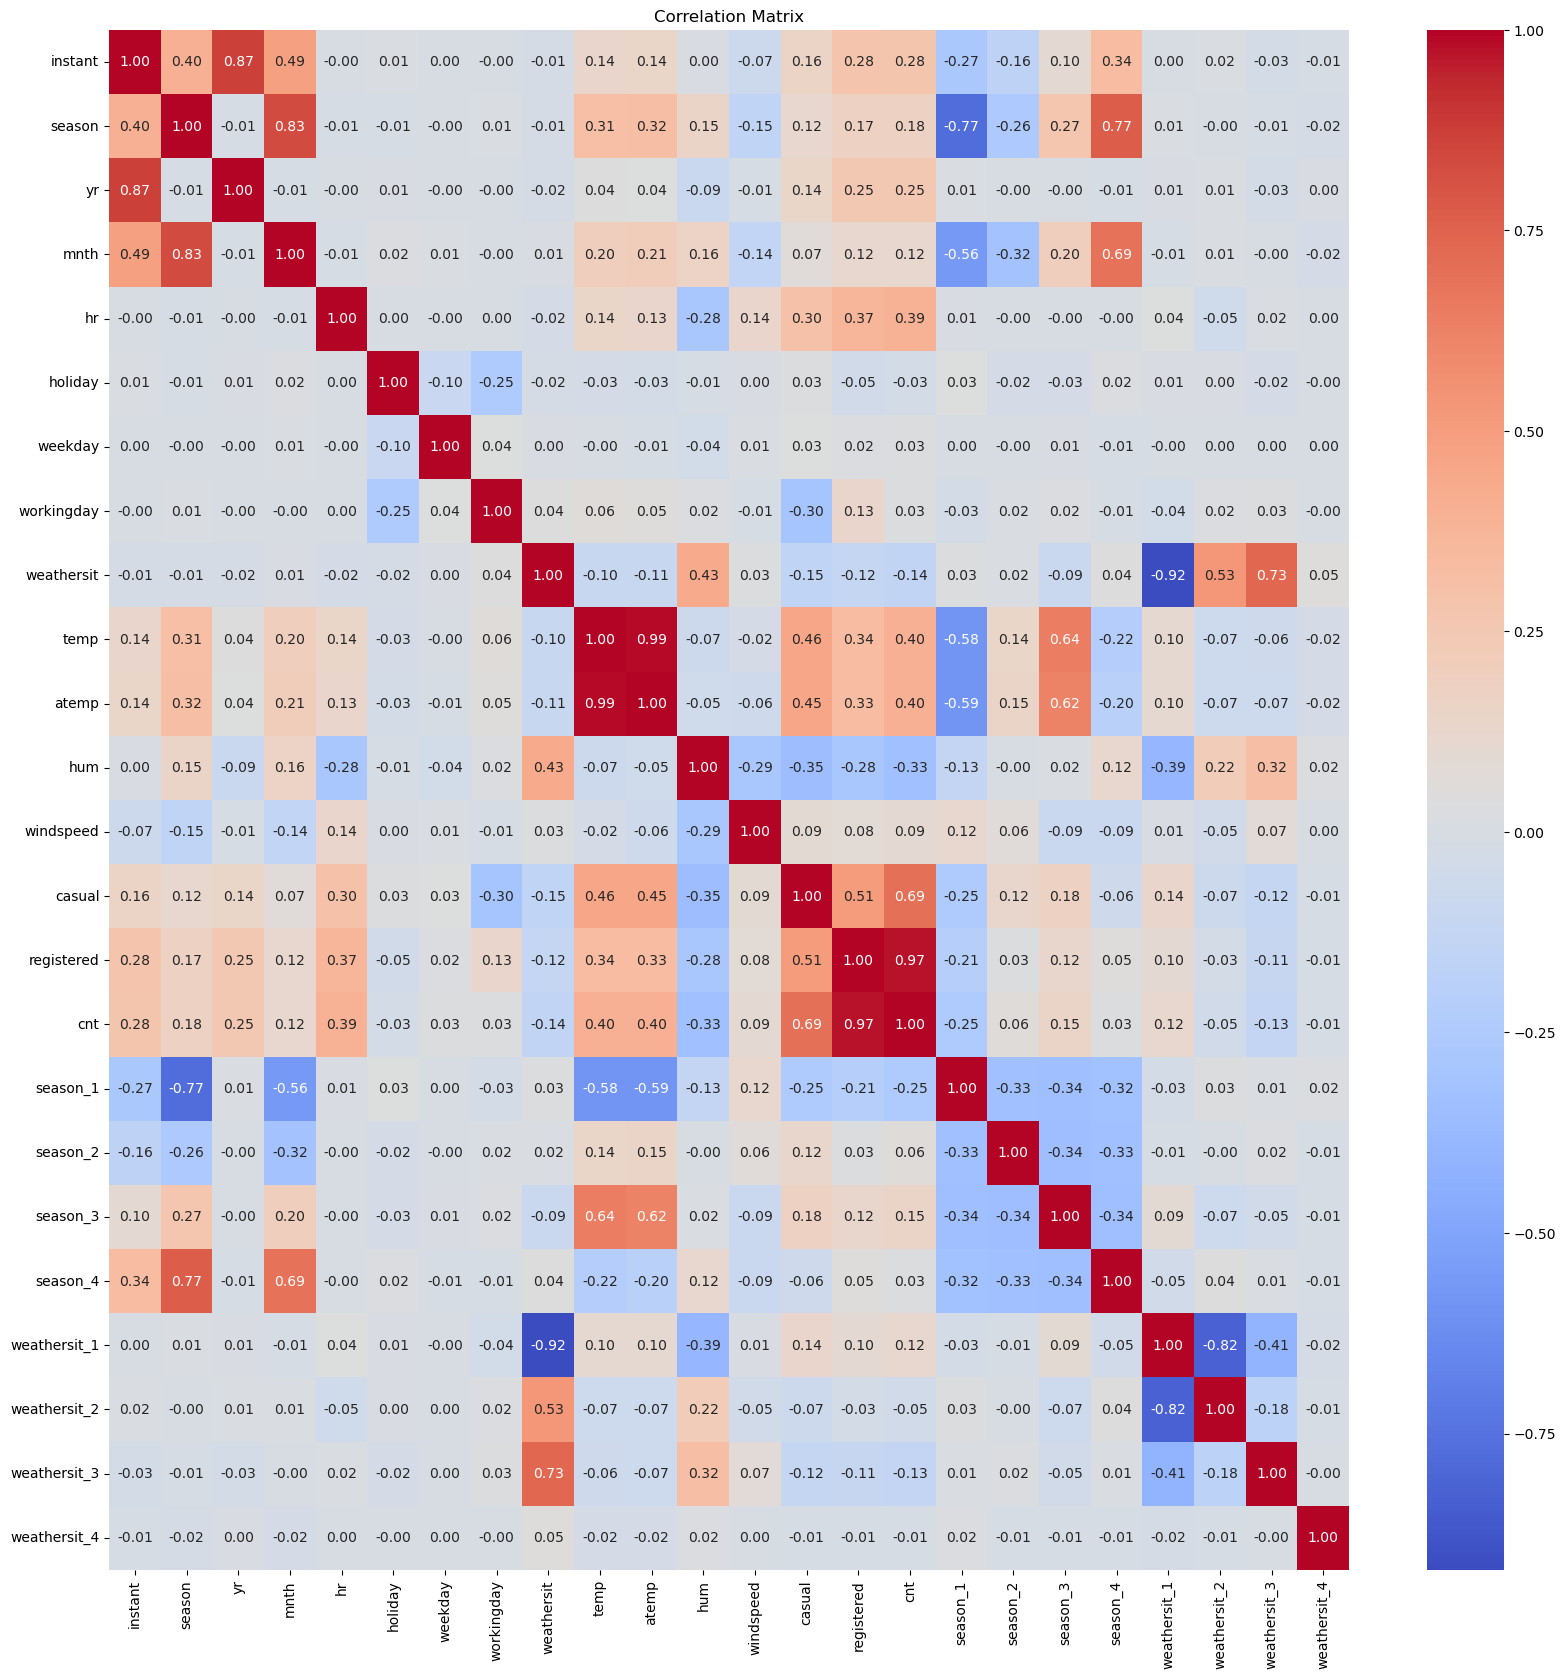

In [24]:
correlation_matrix = hour_df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [25]:
correlation_matrix['cnt'].abs().sort_values(ascending=False)

cnt             1.000000
registered      0.972151
casual          0.694564
temp            0.404772
atemp           0.400929
hr              0.394071
hum             0.328777
instant         0.278379
yr              0.250495
season_1        0.245456
season          0.178056
season_3        0.151621
weathersit      0.142426
weathersit_3    0.128034
mnth            0.120638
weathersit_1    0.117478
windspeed       0.093234
season_2        0.060692
weathersit_2    0.046902
holiday         0.030927
workingday      0.030284
season_4        0.029421
weekday         0.026900
weathersit_4    0.008340
Name: cnt, dtype: float64

In [26]:
correlation_matrix['cnt'].abs().sort_values(ascending=False).index

Index(['cnt', 'registered', 'casual', 'temp', 'atemp', 'hr', 'hum', 'instant',
       'yr', 'season_1', 'season', 'season_3', 'weathersit', 'weathersit_3',
       'mnth', 'weathersit_1', 'windspeed', 'season_2', 'weathersit_2',
       'holiday', 'workingday', 'season_4', 'weekday', 'weathersit_4'],
      dtype='object')

# **4. cnt(대여횟수)와 주요 독립변수들과의 관계 시각화**

## 1) 연, 월, 요일, 시별 대여횟수
- 2011년보다 2012년에 자전거 대여횟수가 늘었을까?
- 가장 많은 대여 횟수가 발생한 달은?
- 출근 시간과 퇴근 시간에 자전거 대여가 많을까?

(100.0, 250.0)

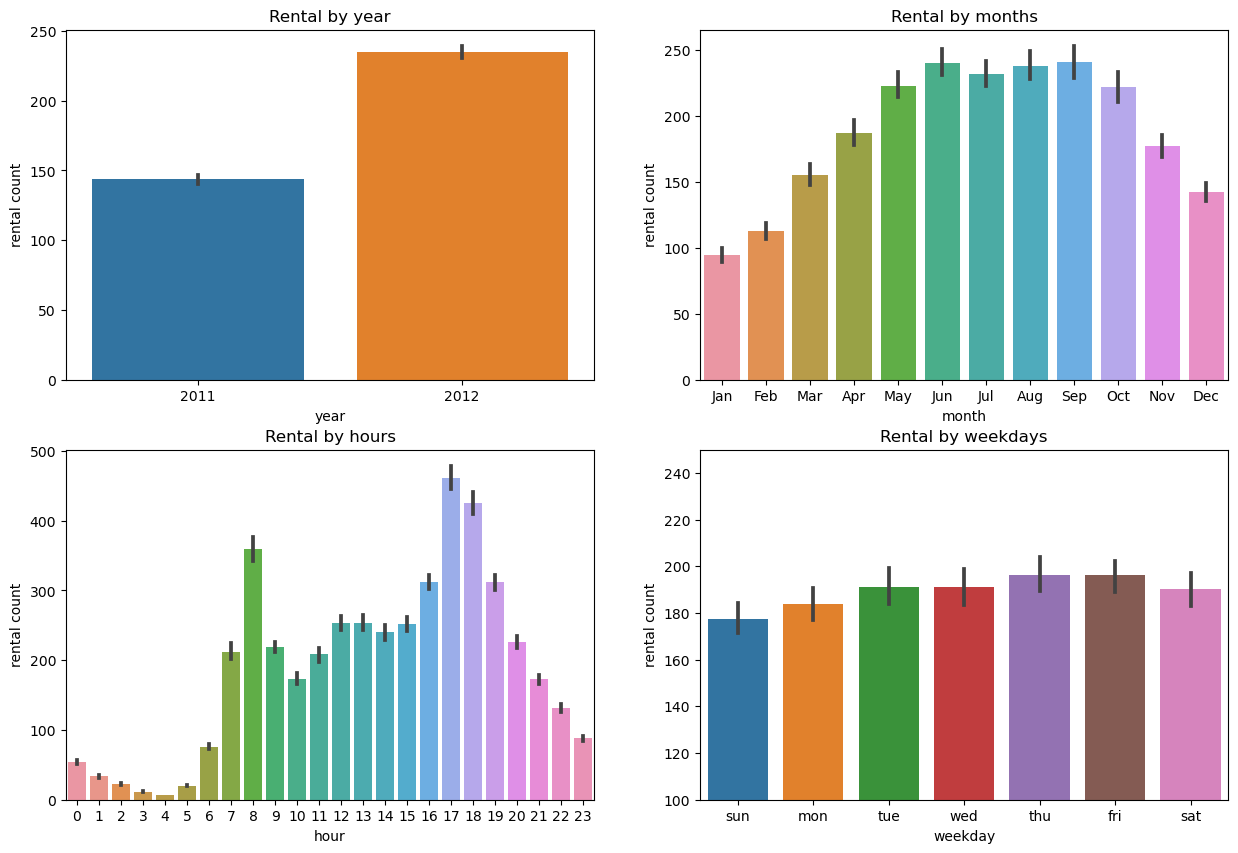

In [27]:
fig = plt.figure(figsize=[15,10])

#year와 cnt
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(data=hour_df, x='yr', y='cnt')
ax1.set_title('Rental by year')
ax1.set_xlabel("year")
ax1.set_ylabel("rental count")
set_year = ['2011', '2012']
ax1.set_xticklabels(set_year)

#month와 cnt
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(data=hour_df, x='mnth', y='cnt')
ax2.set_title('Rental by months')
ax2.set_xlabel("month")
ax2.set_ylabel("rental count")
set_month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax2.set_xticklabels(set_month)

#hour와 cnt
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(data=hour_df, x='hr', y='cnt')
ax3.set_title('Rental by hours')
ax3.set_xlabel("hour")
ax3.set_ylabel("rental count")


#weekday와 cnt
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(data=hour_df, x='weekday', y='cnt')
ax4.set_title('Rental by weekdays')
ax4.set_xlabel("weekday")
ax4.set_ylabel("rental count")
set_weekday = ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']
ax4.set_xticklabels(set_weekday)
ax4.set_ylim(100, 250)

- 연도별 대여횟수는 2011년 보다 2012년에 대여횟수가 늘어난 것으로 파악된다.
- 월별 대여횟수는 6~9월에 대여량이 많다.
- 시간대별 대여횟수는 17-18시 퇴근시간에 가장 많은 대여횟수를 보이고 있고, 오전에는 8시에 대여 횟수가 많았다. --> 출근일 데이터와 비교해보기
- 요일에 차이는 없어보임.

## 2) 휴일과 대여횟수
- 휴일과 근무일의 총 자전거 대여건수가 더 많은 날은? 

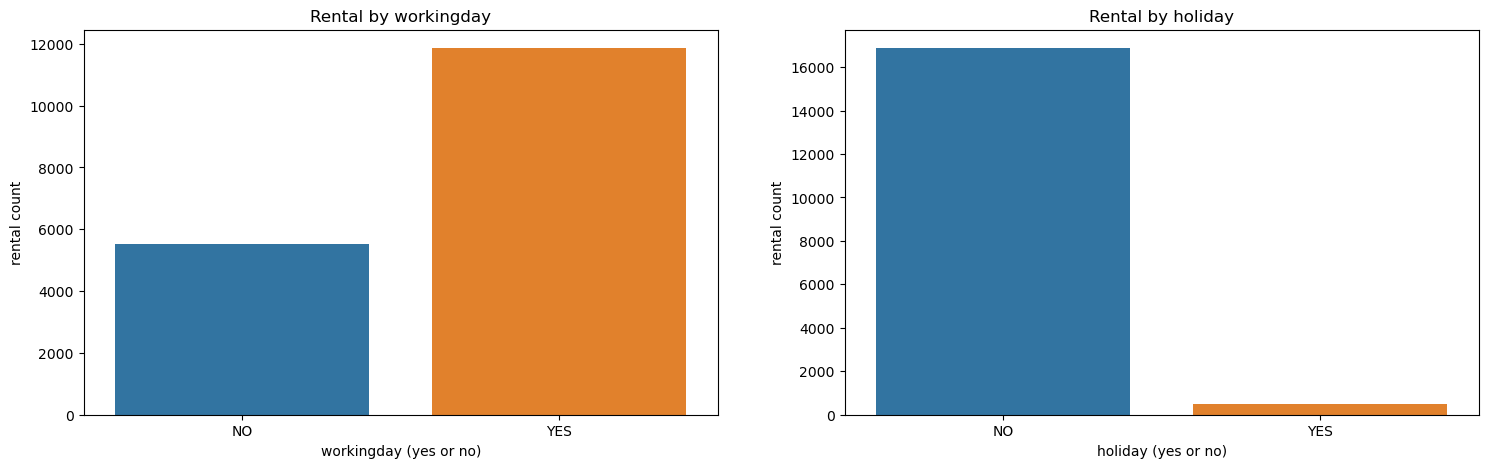

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

ax1 = axes[0]
sns.countplot(x=hour_df["workingday"], ax=ax1)
ax1.set_title('Rental by workingday')
ax1.set_xlabel("workingday (yes or no)")
ax1.set_ylabel("rental count")
ax1.set_xticklabels(['NO', 'YES'])

ax2 = axes[1]
sns.countplot(x=hour_df["holiday"], ax=ax2)
ax2.set_title('Rental by holiday')
ax2.set_xlabel("holiday (yes or no)")
ax2.set_ylabel("rental count")
ax2.set_xticklabels(['NO', 'YES'])

plt.show()

- 출근일 > 대여건수, 휴일이 아닌 경우 > 대여건수가 더 많은 것을 확인

## 3) 출근일 여부에 따른 시간대별 대여횟수

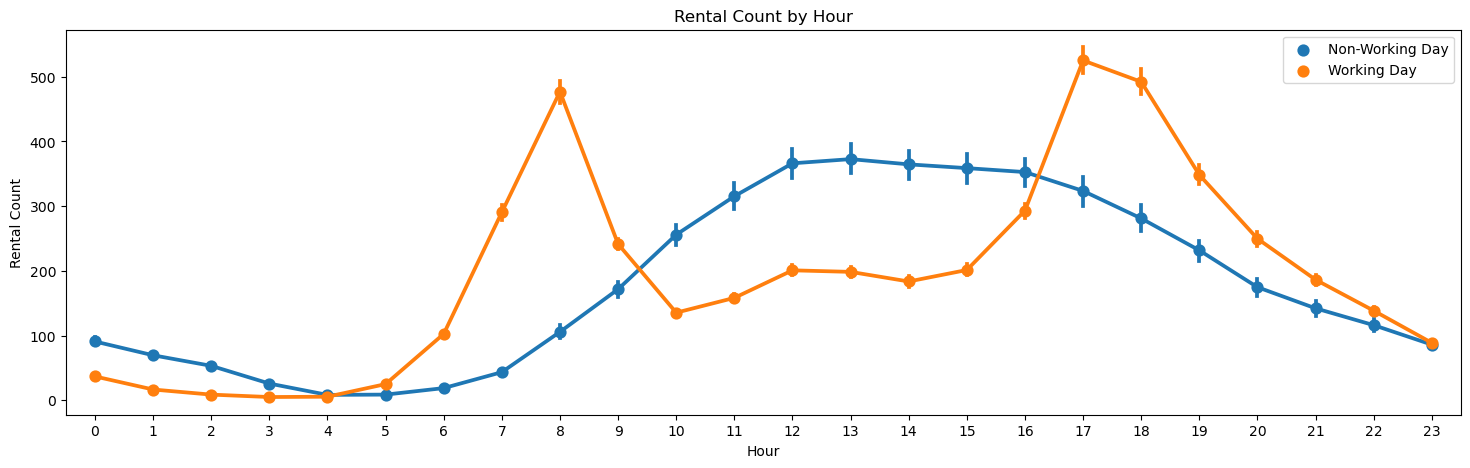

In [29]:
fig, ax1 = plt.subplots(1, 1, figsize=(18, 5))

sns.pointplot(data=hour_df, x='hr', y='cnt', hue='workingday', ax=ax1)

plt.title("Rental Count by Hour")
plt.xlabel("Hour")
plt.ylabel("Rental Count")

# 범례에 있는 선의 이름 설정
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, ["Non-Working Day", "Working Day"])

plt.show()

- 출근날 출근시간 8시와, 퇴근시간인 5-6시 대여량이 많았다.

## 4) 계절별 대여횟수
- 총 대여 횟수와 시즌 사이에 상관관계
- 자전거 대여가 가장 많은 계절은 언제?

[Text(0, 0, 'spring'),
 Text(1, 0, 'summer'),
 Text(2, 0, 'fall'),
 Text(3, 0, 'winter')]

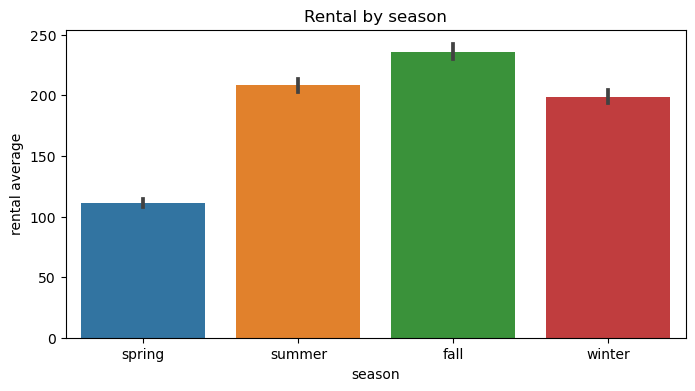

In [30]:
fig = plt.figure(figsize=[8, 4])
ax = fig.add_subplot(1, 1, 1)
ax = sns.barplot(data=hour_df, x='season', y='cnt')
ax.set_title('Rental by season')
ax.set_ylabel("rental average")

set_season = ['spring', 'summer', 'fall', 'winter']
ax.set_xticklabels(set_season)

- 시즌의 경우 봄의 대여횟수가 겨울보다 적음 --> 위에 월별 데이터를 보면 3~5월 봄이 12~2월 겨울 데이터 보다 대여횟수가 많음 

## 5) 날씨별 대여횟수
- 총 자전거 대여 횟수가 가장 낮거나 가장 많은 기상 조건은?

[Text(0, 0, 'clear and cloudy'),
 Text(1, 0, 'fog'),
 Text(2, 0, 'light rain_snow'),
 Text(3, 0, 'heavy rain_snow')]

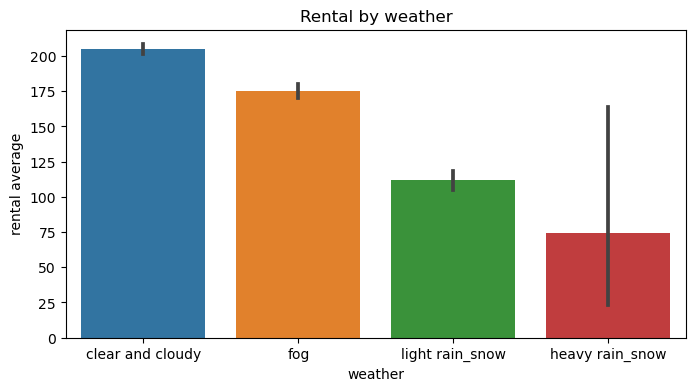

In [31]:
fig = plt.figure(figsize=[8, 4])
ax = fig.add_subplot(1, 1, 1)
ax = sns.barplot(data=hour_df, x='weathersit', y='cnt')

ax.set_title('Rental by weather')
ax.set_ylabel("rental average")
ax.set_xlabel("weather")
set_weather = ['clear and cloudy', 'fog', 'light rain_snow', 'heavy rain_snow']
ax.set_xticklabels(set_weather)

- 예상대로 날씨가 좋은 날에 대여횟수가 많고 숫자가 커질수 록(날씨가 좋지 않음) 대여횟수가 적어짐.

## 6) 온도, 습도, 풍속에 따라 평균 대여량에 변화가 있는가?

In [32]:
mean_temp = hour_df.groupby('temp')['cnt'].mean().reset_index()
mean_hum = hour_df.groupby('hum')['cnt'].mean().reset_index()
mean_windspeed = hour_df.groupby('windspeed')['cnt'].mean().reset_index()

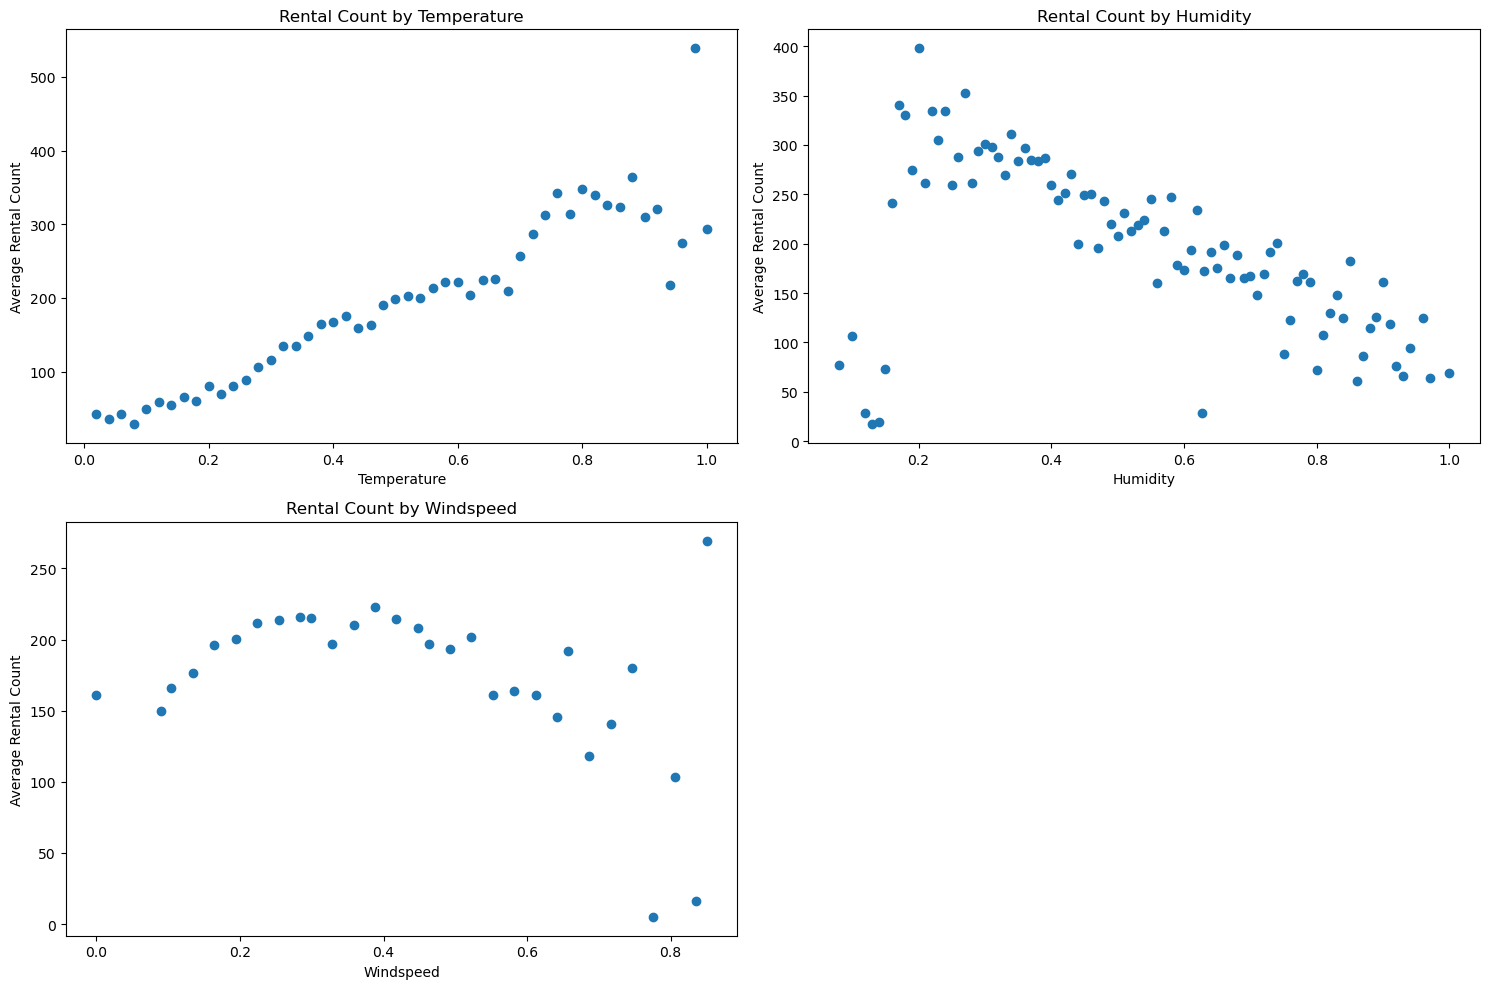

In [33]:
fig = plt.figure(figsize=[15,10])

# 온도에 따른 대여건수 (평균)
ax1 = fig.add_subplot(2,2,1)
ax1.scatter(mean_temp['temp'], mean_temp['cnt'])
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Average Rental Count')
ax1.set_title('Rental Count by Temperature')

# 습도에 따른 대여건수 (평균)
ax2 = fig.add_subplot(2,2,2)
ax2.scatter(mean_hum['hum'], mean_hum['cnt'])
ax2.set_xlabel('Humidity')
ax2.set_ylabel('Average Rental Count')
ax2.set_title('Rental Count by Humidity')

# 풍속에 따른 대여건수 (평균)
ax3 = fig.add_subplot(2,2,3)
ax3.scatter(mean_windspeed['windspeed'], mean_windspeed['cnt'])
ax3.set_xlabel('Windspeed')
ax3.set_ylabel('Average Rental Count')
ax3.set_title('Rental Count by Windspeed')

plt.tight_layout()
plt.show()

# **5. 다중회귀분석**

#### **독립변수(x)와 종속변수(y)**
- 종속변수 대여횟수에 영향을 미치는 독립변수

In [34]:
hour_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_1', 'season_2', 'season_3',
       'season_4', 'weathersit_1', 'weathersit_2', 'weathersit_3',
       'weathersit_4'],
      dtype='object')

In [35]:
formula = 'cnt~ temp + hr + hum + yr + season_1 + season_3 + weathersit_3 + windspeed + holiday + season_4 + weekday'
results = smf.ols(formula, hour_df).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     1048.
Date:                Mon, 02 Oct 2023   Prob (F-statistic):               0.00
Time:                        02:53:58   Log-Likelihood:            -1.1062e+05
No. Observations:               17379   AIC:                         2.213e+05
Df Residuals:                   17367   BIC:                         2.214e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.3907      8.168     -0.293   

## R-squared: 0.399으로 낮은 설명력 -> 종속변수에 영향을 미치는 변수 개발이 필요

## **5. VIF 다중공선성**

In [36]:
# 회귀 모델에 사용할 독립 변수 선택
independent_vars = ['temp', 'hr', 'hum', 'yr', 'season_1', 'season_3', 'weathersit_3', 'windspeed', 'holiday', 'season_4', 'weekday']

# 회귀 모델 적합
X = sm.add_constant(hour_df[independent_vars])
y = hour_df['cnt']
model = sm.OLS(y, X)
results = model.fit()

# VIF 계산
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


        Variable        VIF
0          const  58.589732
1           temp   2.809774
2             hr   1.145477
3            hum   1.410098
4             yr   1.014347
5       season_1   2.367549
6       season_3   1.897410
7   weathersit_3   1.174480
8      windspeed   1.149234
9        holiday   1.013308
10      season_4   1.696390
11       weekday   1.012603
